## homework_vishalsahare_06_best_practices

## Q1. Refactoring
Before we can start covering our code with tests, we need to refactor it. We'll start by getting rid of all the global variables.

Let's create a function main with two parameters: year and month.
Move all the code (except read_data) inside main
Make categorical a parameter for read_data and pass it inside main
Now we need to create the "main" block from which we'll invoke the main function. How does the if statement that we use for this looks like?

Hint: after refactoring, check that the code still works. Just run it e.g. for March 2023 and see if it finishes successfully.

To make it easier to run it, you can write results to your local filesystem. E.g. here:

output_file = f'taxi_type=yellow_year={year:04d}_month={month:02d}.parquet'

## Vishal's Answer for Q1 : if __name__ == '__main__'

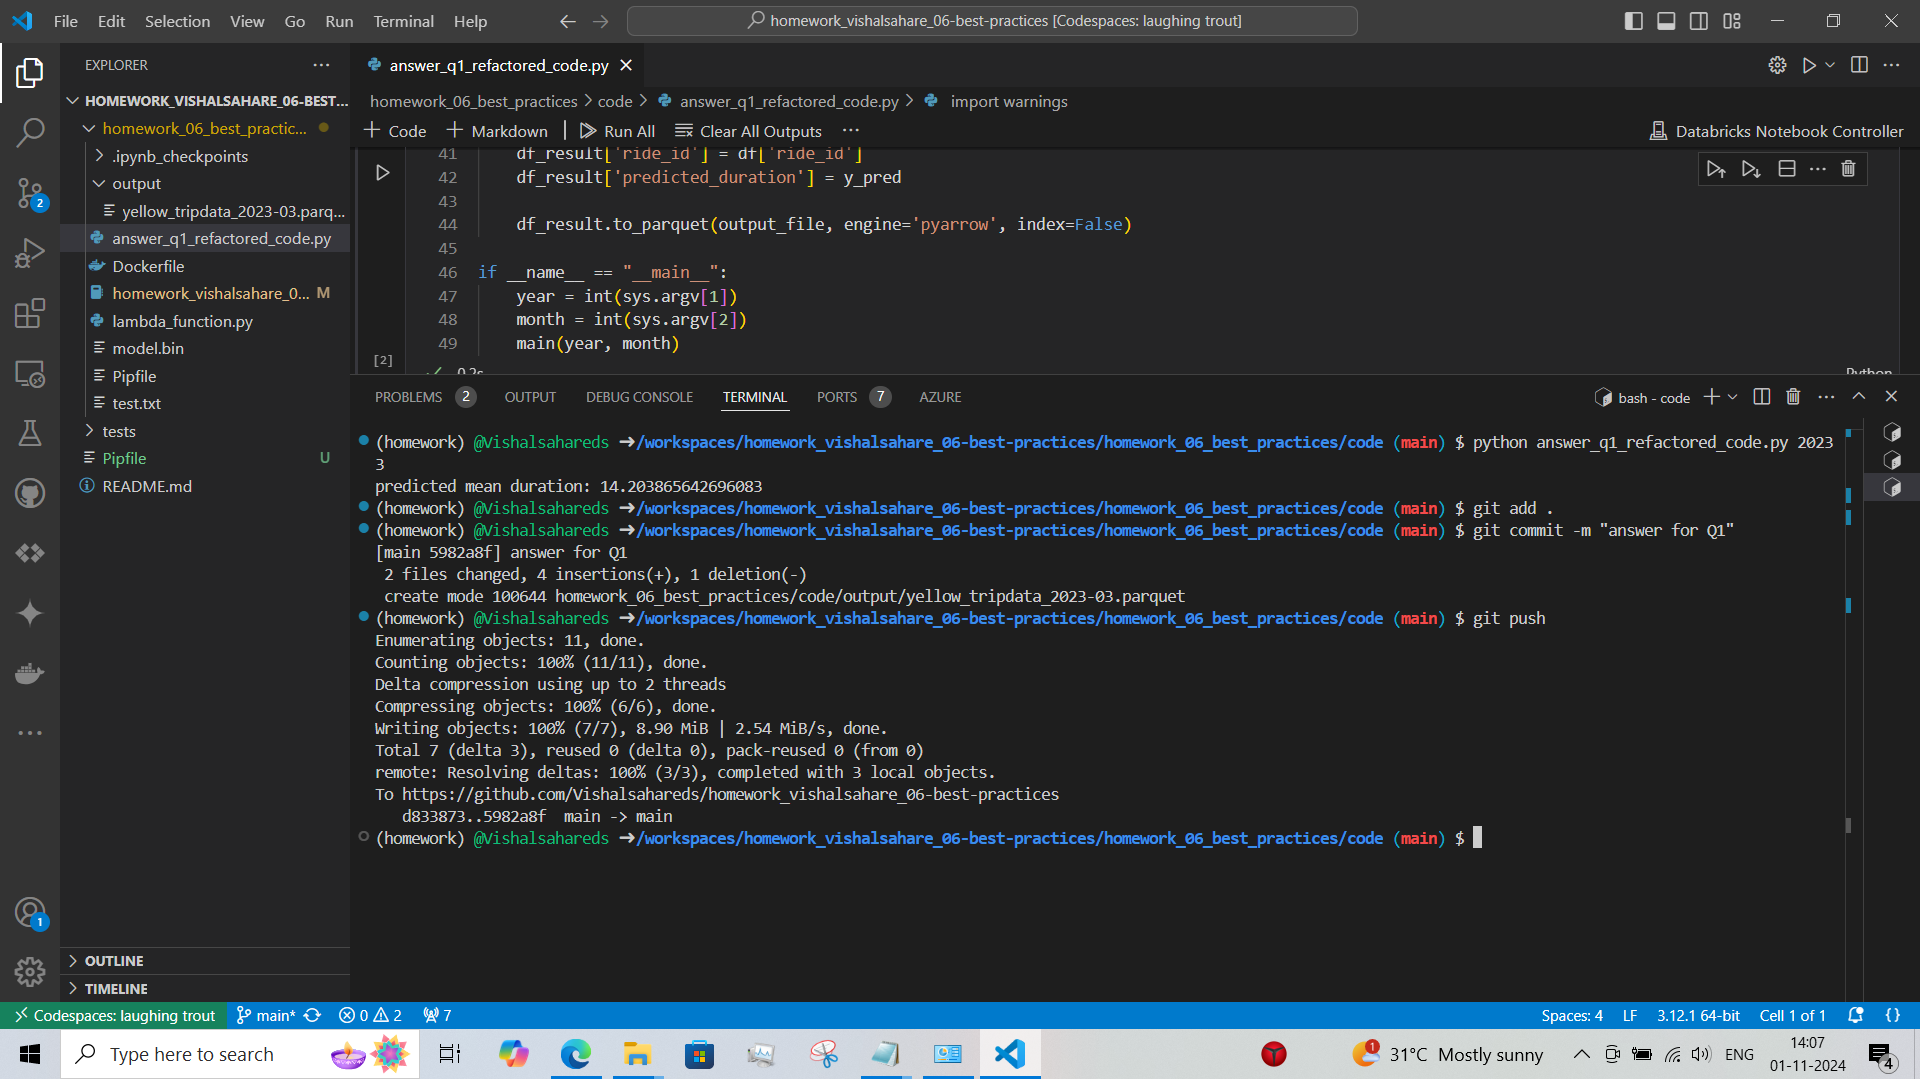



## Q2. Installing pytest
Now we need to install pytest:

pipenv install --dev pytest
Next, create a folder tests and create two files. One will be the file with tests. We can name it test_batch.py.

What should be the other file?

Hint: to be able to test batch.py, we need to be able to import it. Without this other file, we won't be able to do it.

## Vishal's Answer for Q2 : "__init__.py"

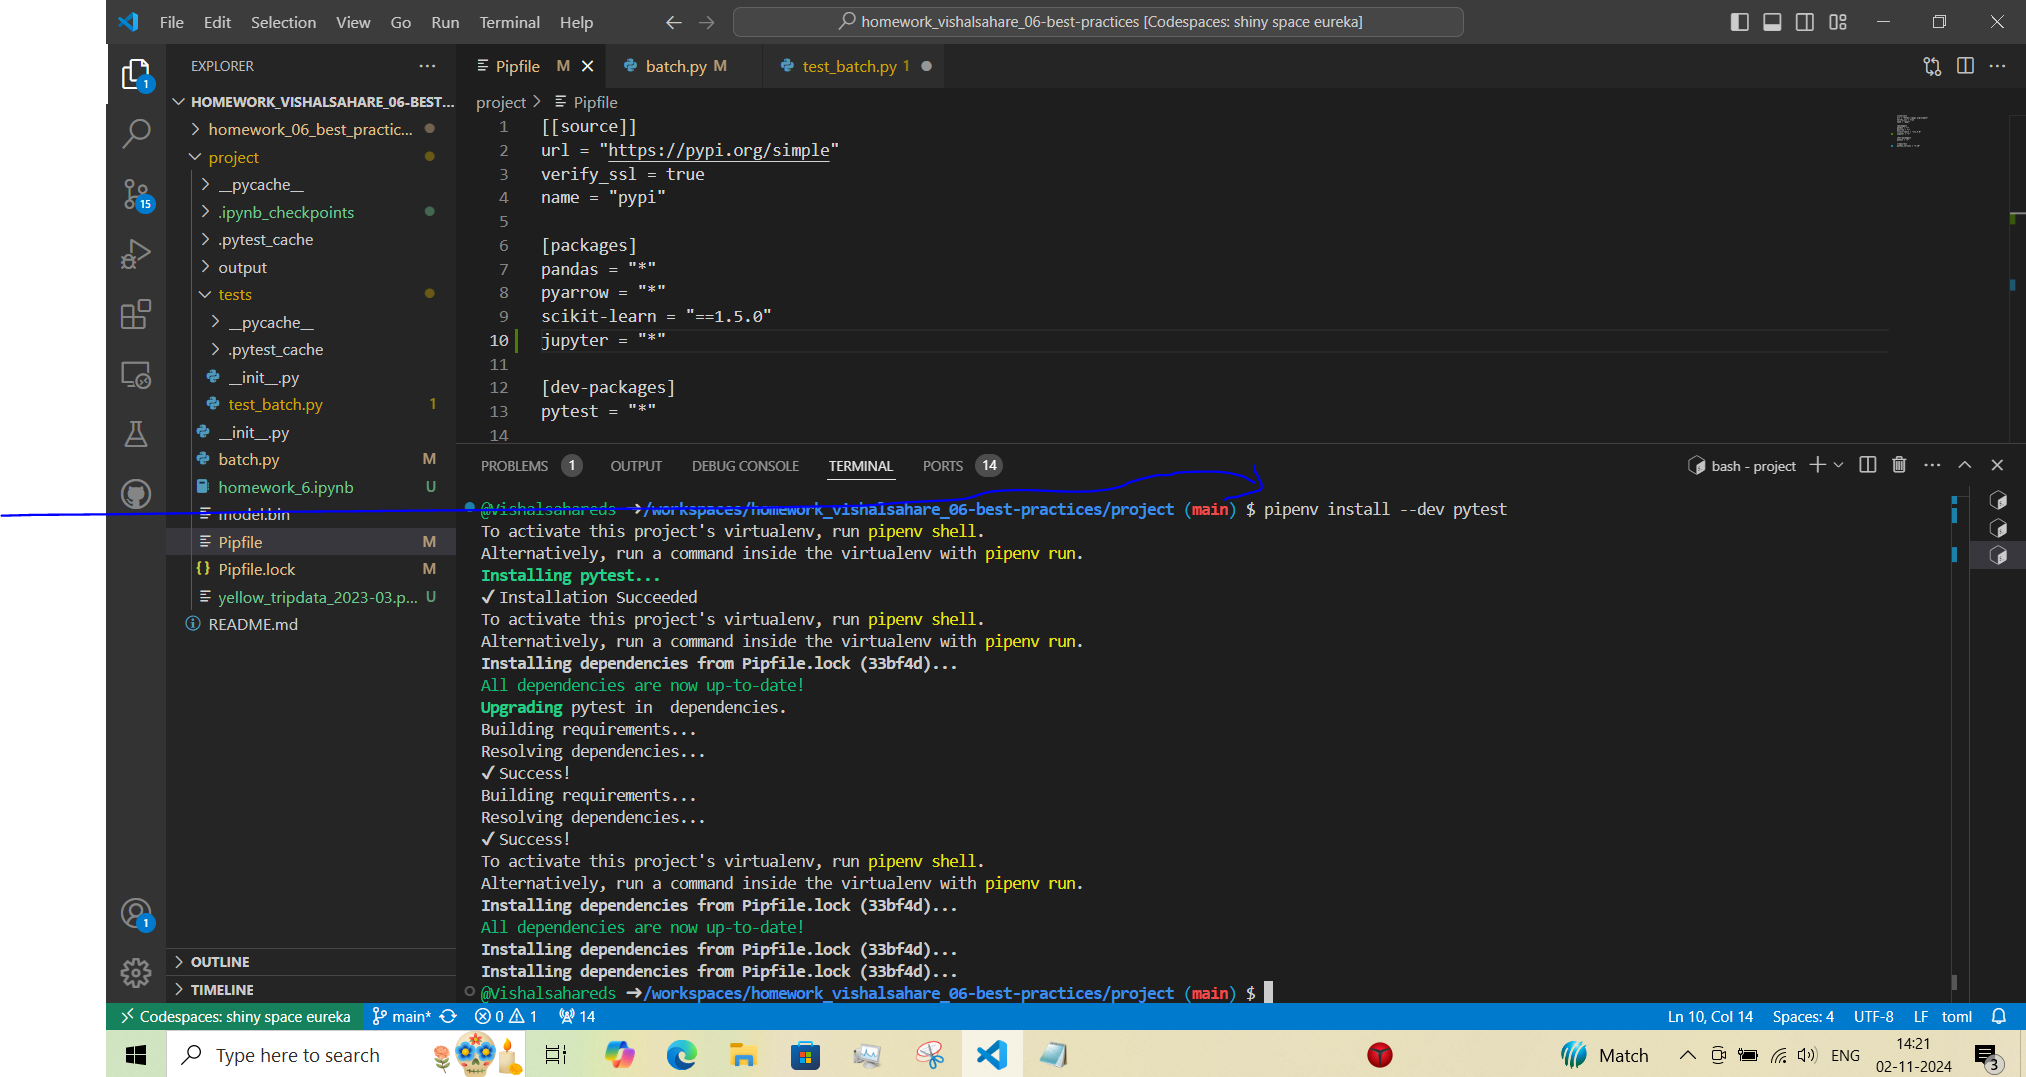

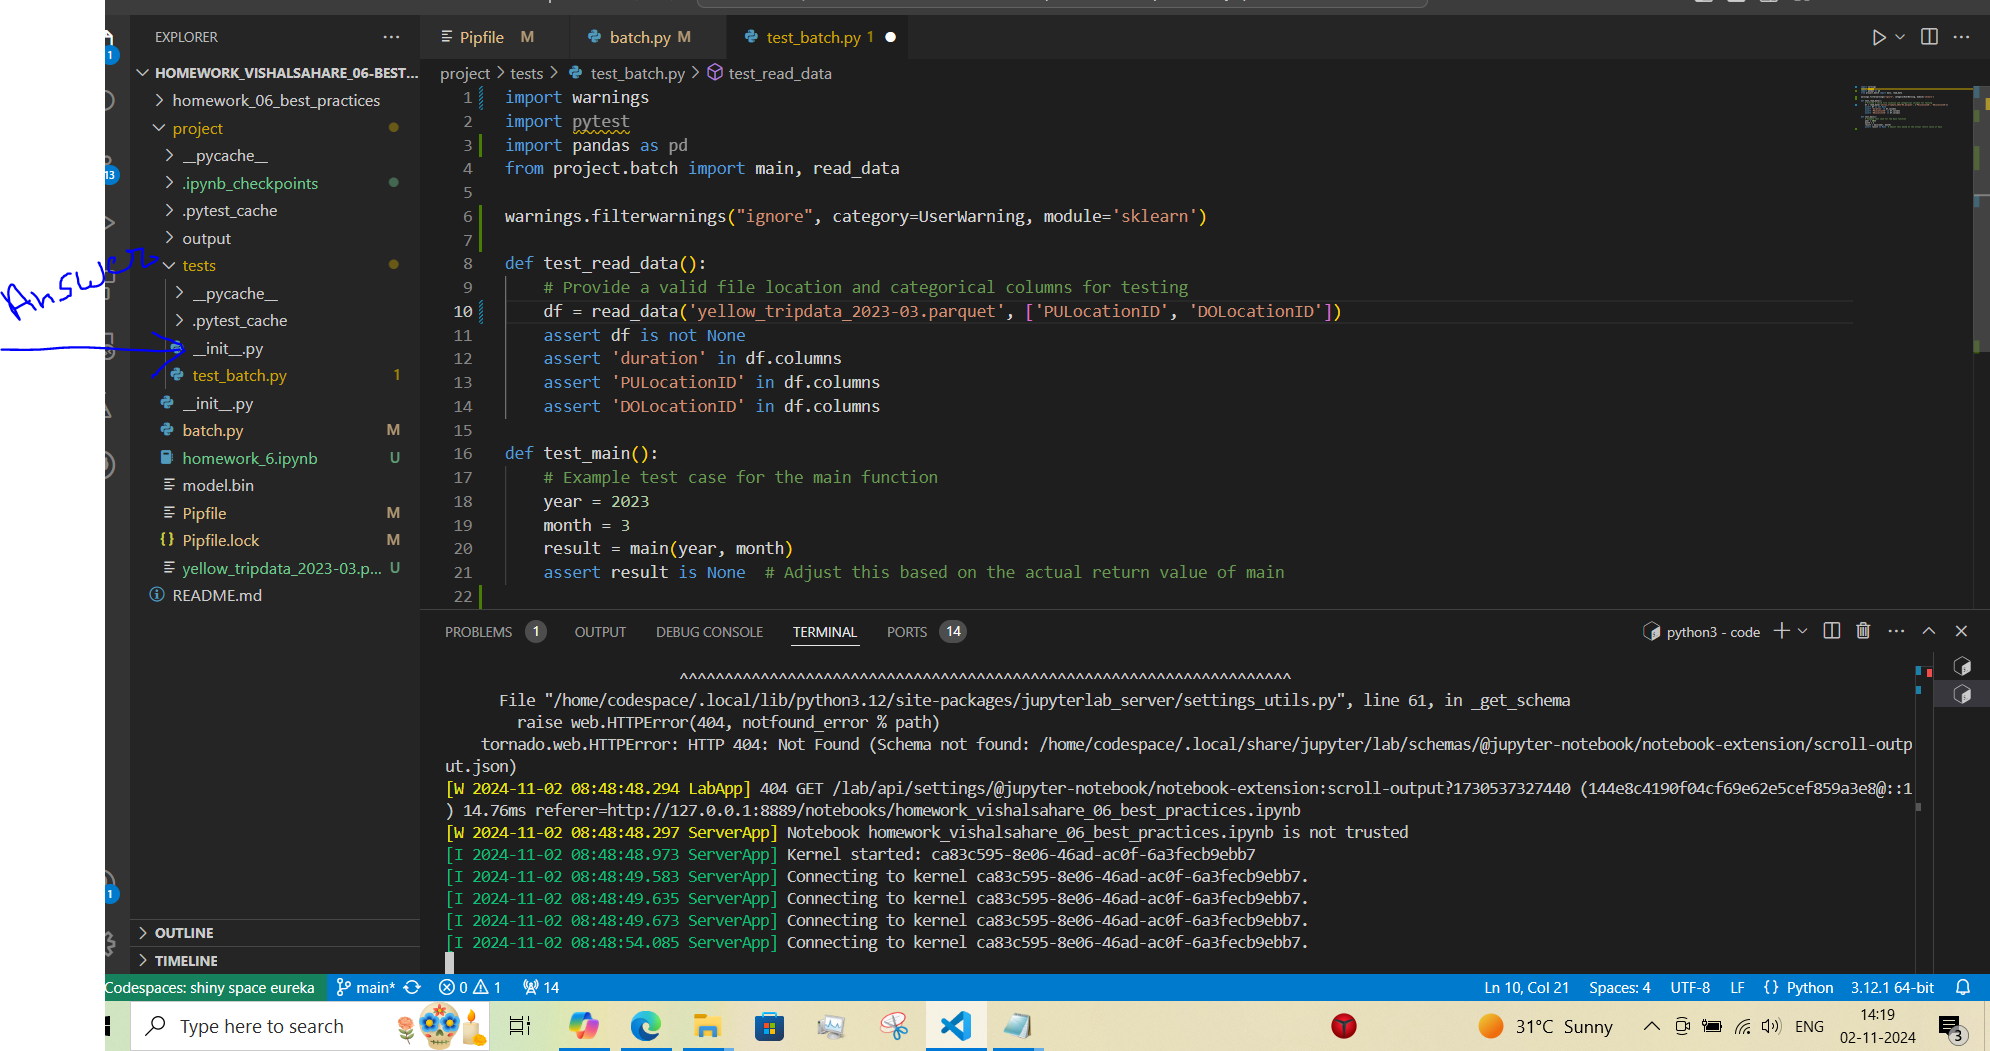



## Q3. Writing first unit test
Now let's cover our code with unit tests.

We'll start with the pre-processing logic inside read_data.

It's difficult to test right now because first reads the file and then performs some transformations. We need to split this code into two parts: reading (I/O) and transformation.

So let's create a function prepare_data that takes in a dataframe (and some other parameters too) and applies some transformation to it.

(That's basically the entire read_data function after reading the parquet file)

Now create a test and use this as input:

data = [
    (None, None, dt(1, 1), dt(1, 10)),
    (1, 1, dt(1, 2), dt(1, 10)),
    (1, None, dt(1, 2, 0), dt(1, 2, 59)),
    (3, 4, dt(1, 2, 0), dt(2, 2, 1)),      
]

columns = ['PULocationID', 'DOLocationID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime']
df = pd.DataFrame(data, columns=columns)
Where dt is a helper function:

from datetime import datetime

def dt(hour, minute, second=0):
    return datetime(2023, 1, 1, hour, minute, second)
Define the expected output and use the assert to make sure that the actual dataframe matches the expected one.

Tip: When you compare two Pandas DataFrames, the result is also a DataFrame. The same is true for Pandas Series. Also, a DataFrame could be turned into a list of dictionaries.

# How many rows should be there in the expected dataframe?

1

2

3

4

## Vishal's Answer for Q3 : 2

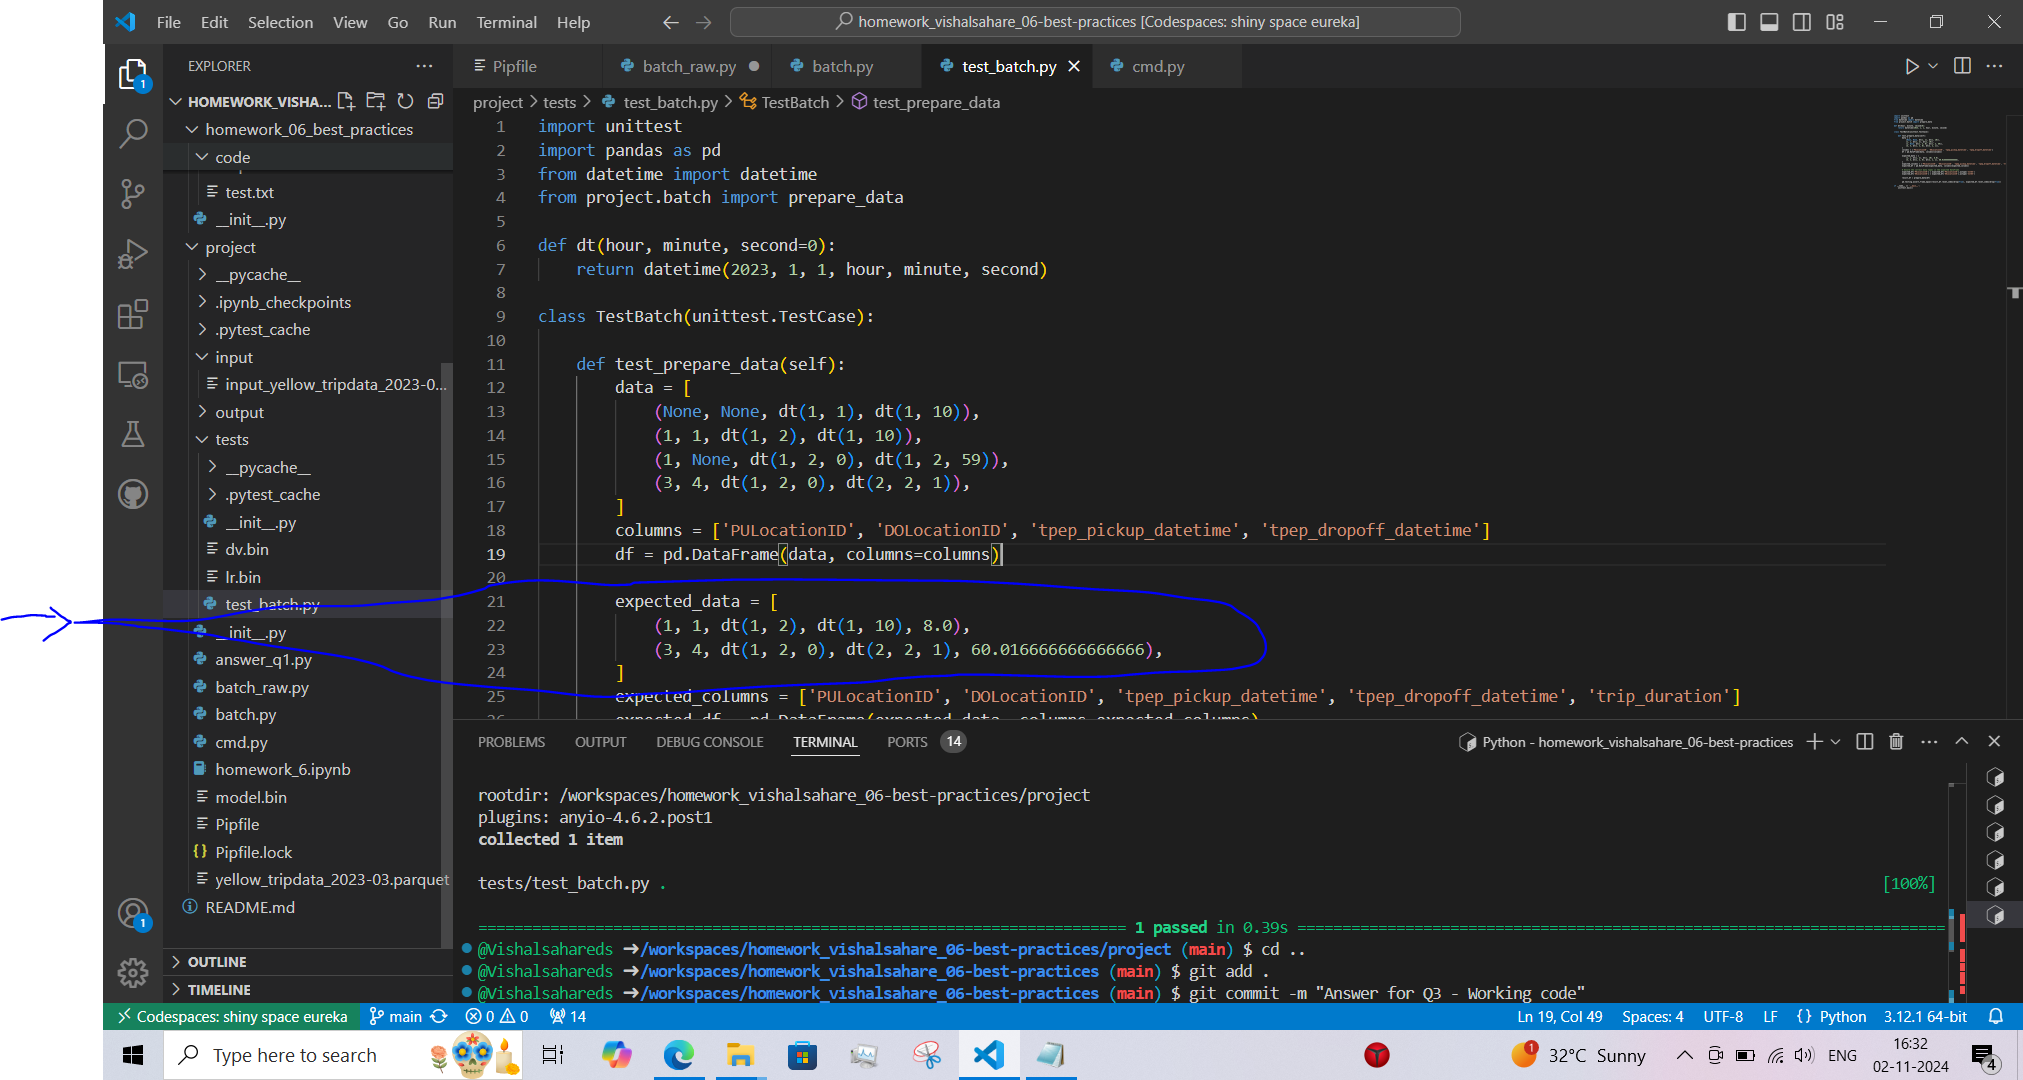

## Q4. Mocking S3 with Localstack
Now let's prepare for an integration test. In our script, we write data to S3. So we'll use Localstack to mimic S3.

First, let's run Localstack with Docker compose. Let's create a docker-compose.yaml file with just one service: localstack. Inside localstack, we're only interested in running S3.

Start the service and test it by creating a bucket where we'll keep the output. Let's call it "nyc-duration".

With AWS CLI, this is how we create a bucket:

aws s3 mb s3://nyc-duration
Then we need to check that the bucket was successfully created. With AWS, this is how we typically do it:

aws s3 ls
In both cases we should adjust commands for localstack. What option do we need to use for such purposes?

--backend-store-uri

--profile

--endpoint-url

--version

## Vishal's Answer for Q4: --endpoint-url

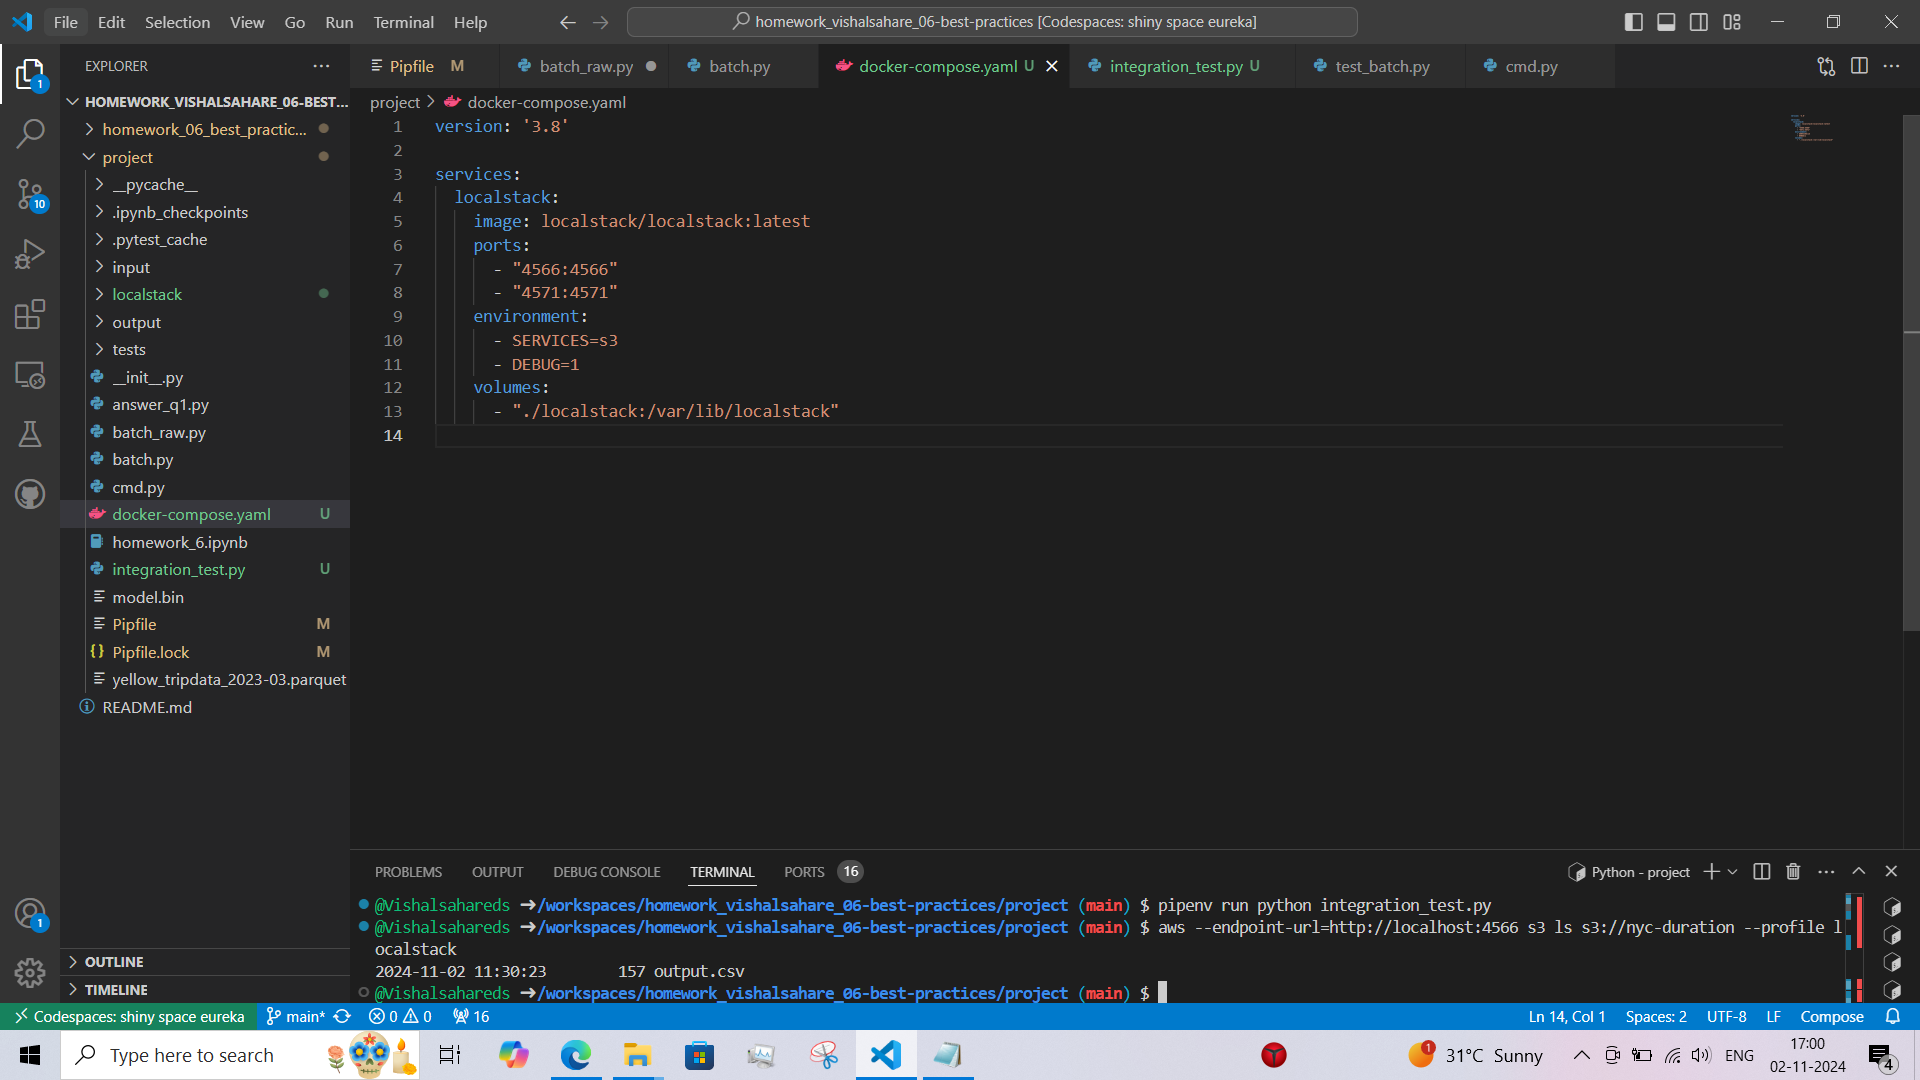

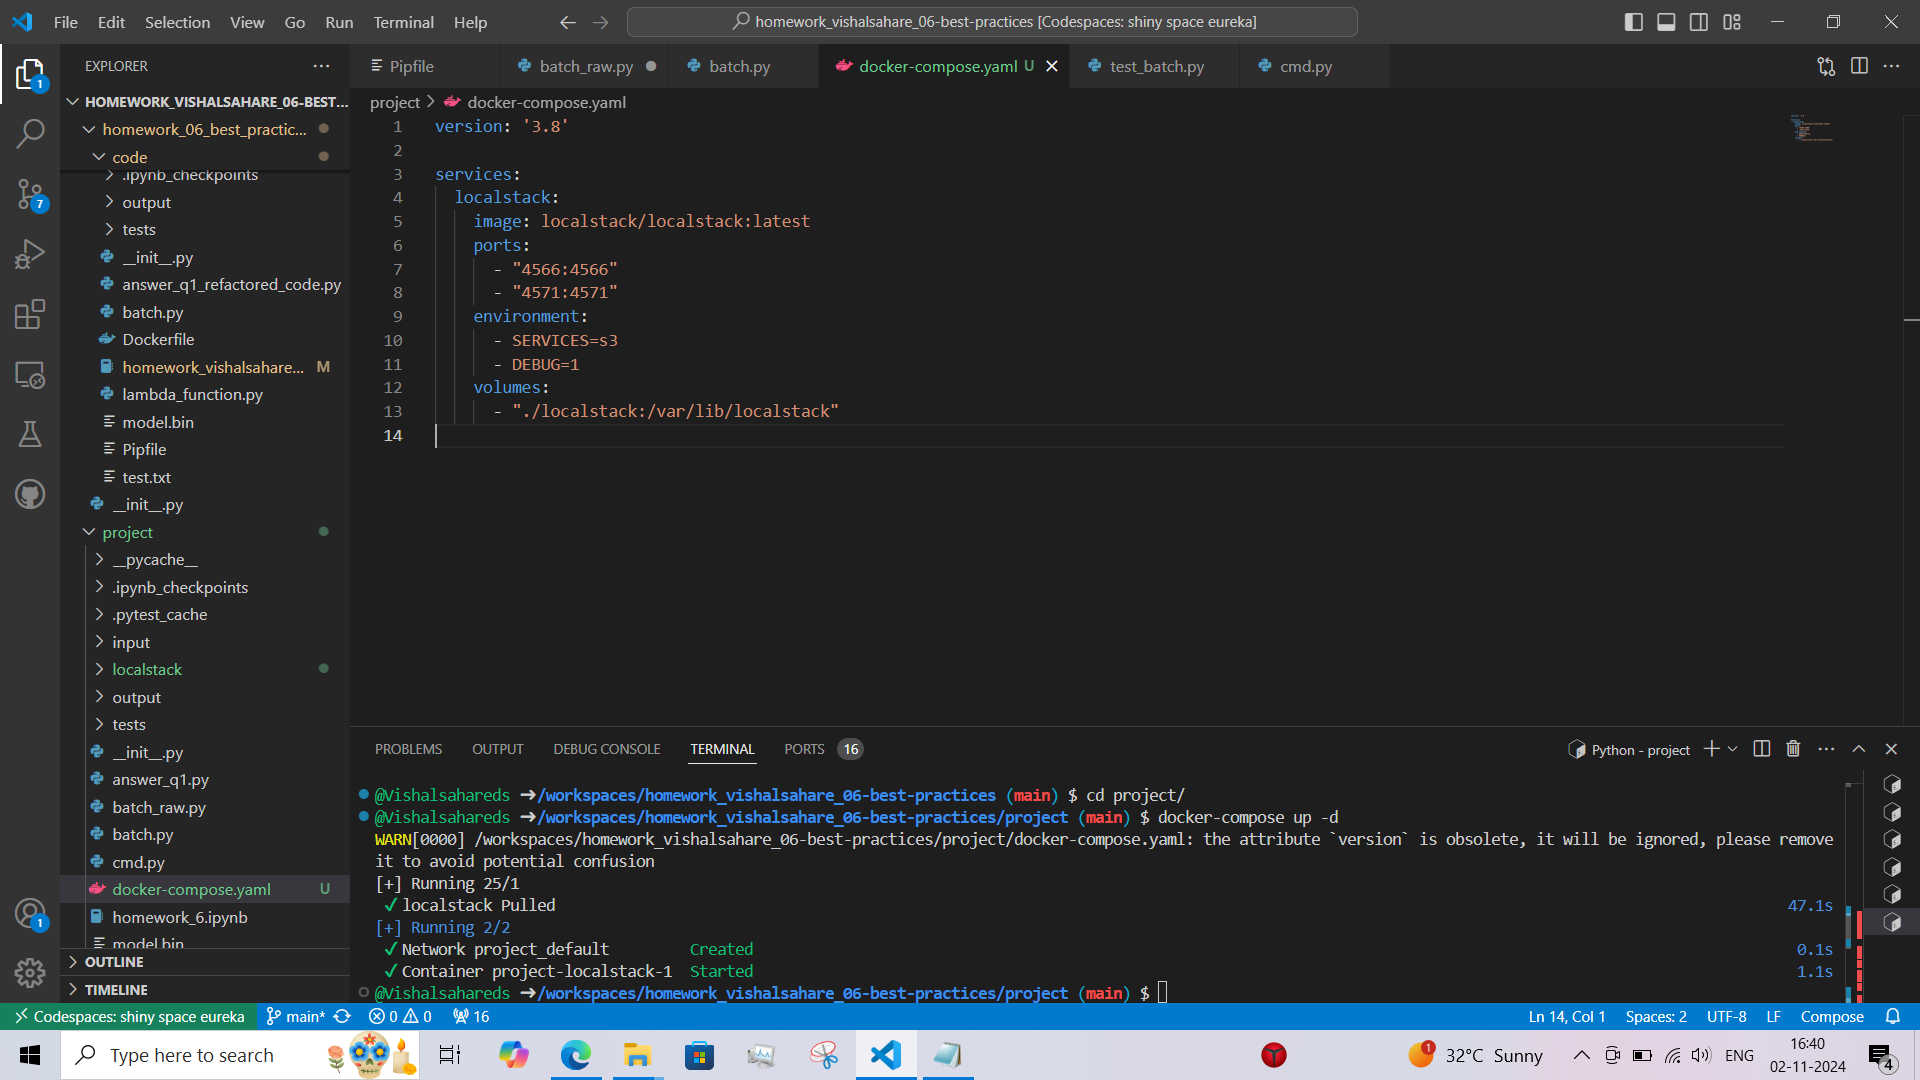

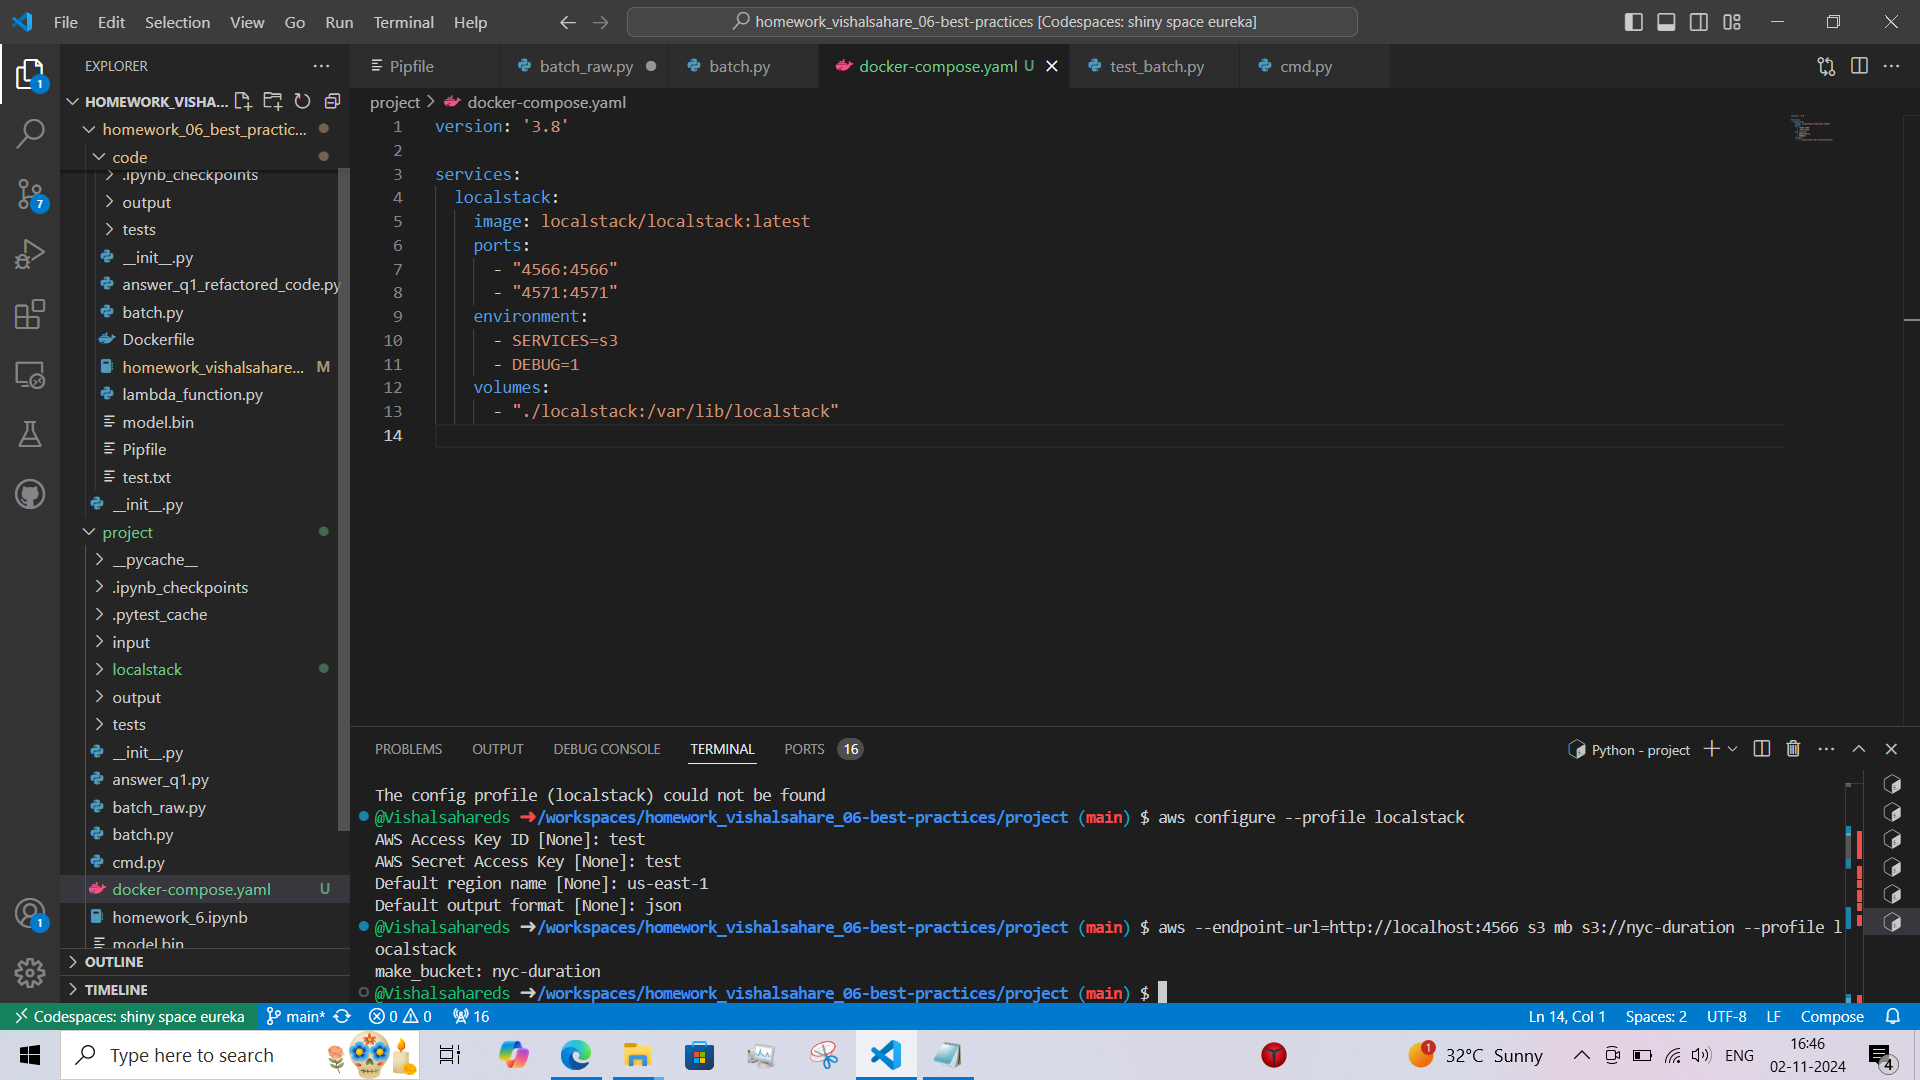

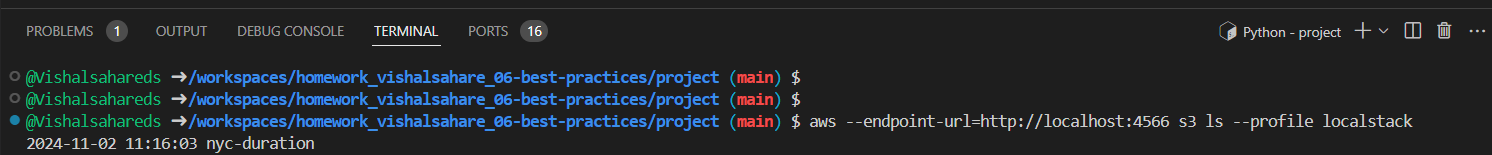


## Q5. Creating test data
Now let's create integration_test.py

We'll use the dataframe we created in Q3 (the dataframe for the unit test) and save it to S3. You don't need to do anything else: just create a dataframe and save it.

We will pretend that this is data for January 2023.

Run the integration_test.py script. After that, use AWS CLI to verify that the file was created.

Use this snipped for saving the file:

df_input.to_parquet(
    input_file,
    engine='pyarrow',
    compression=None,
    index=False,
    storage_options=options
)
What's the size of the file?

3620

23620

43620

63620

## Vishal's Answer for Q5 : 3620

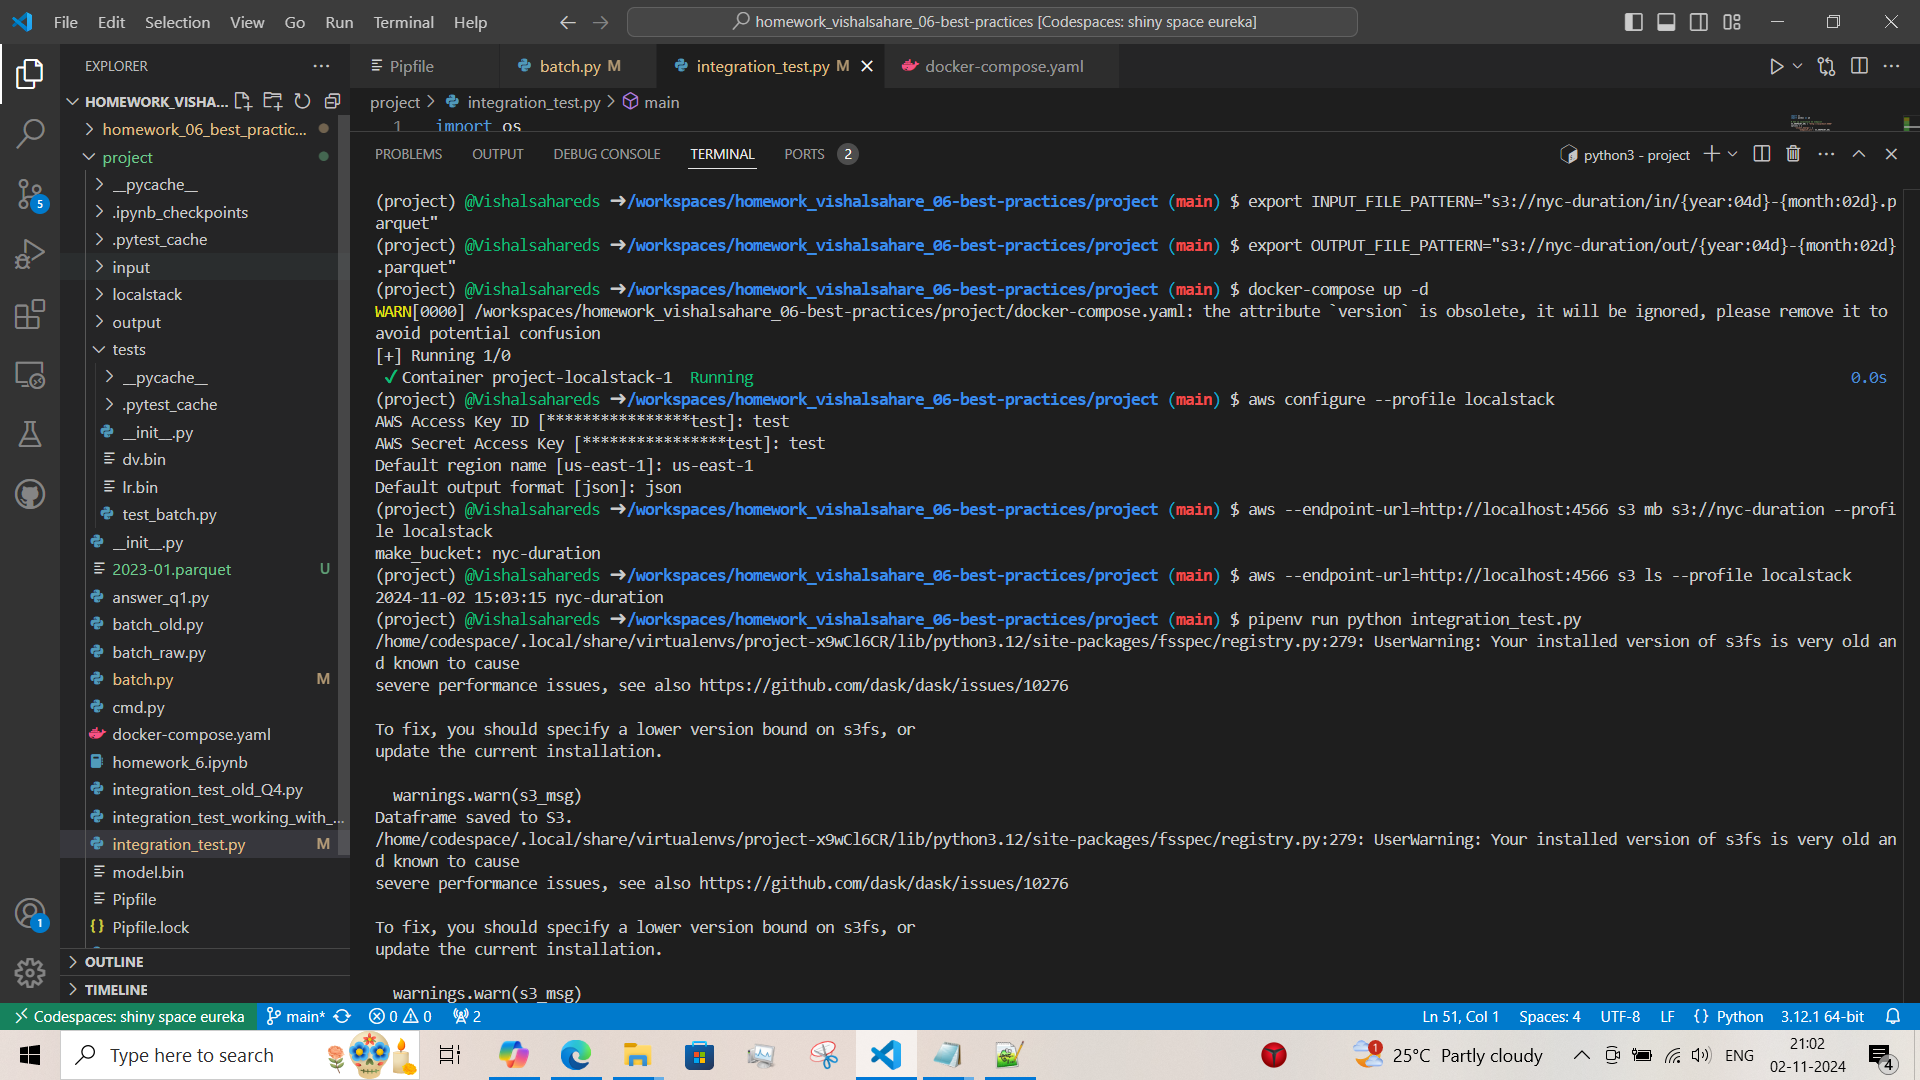

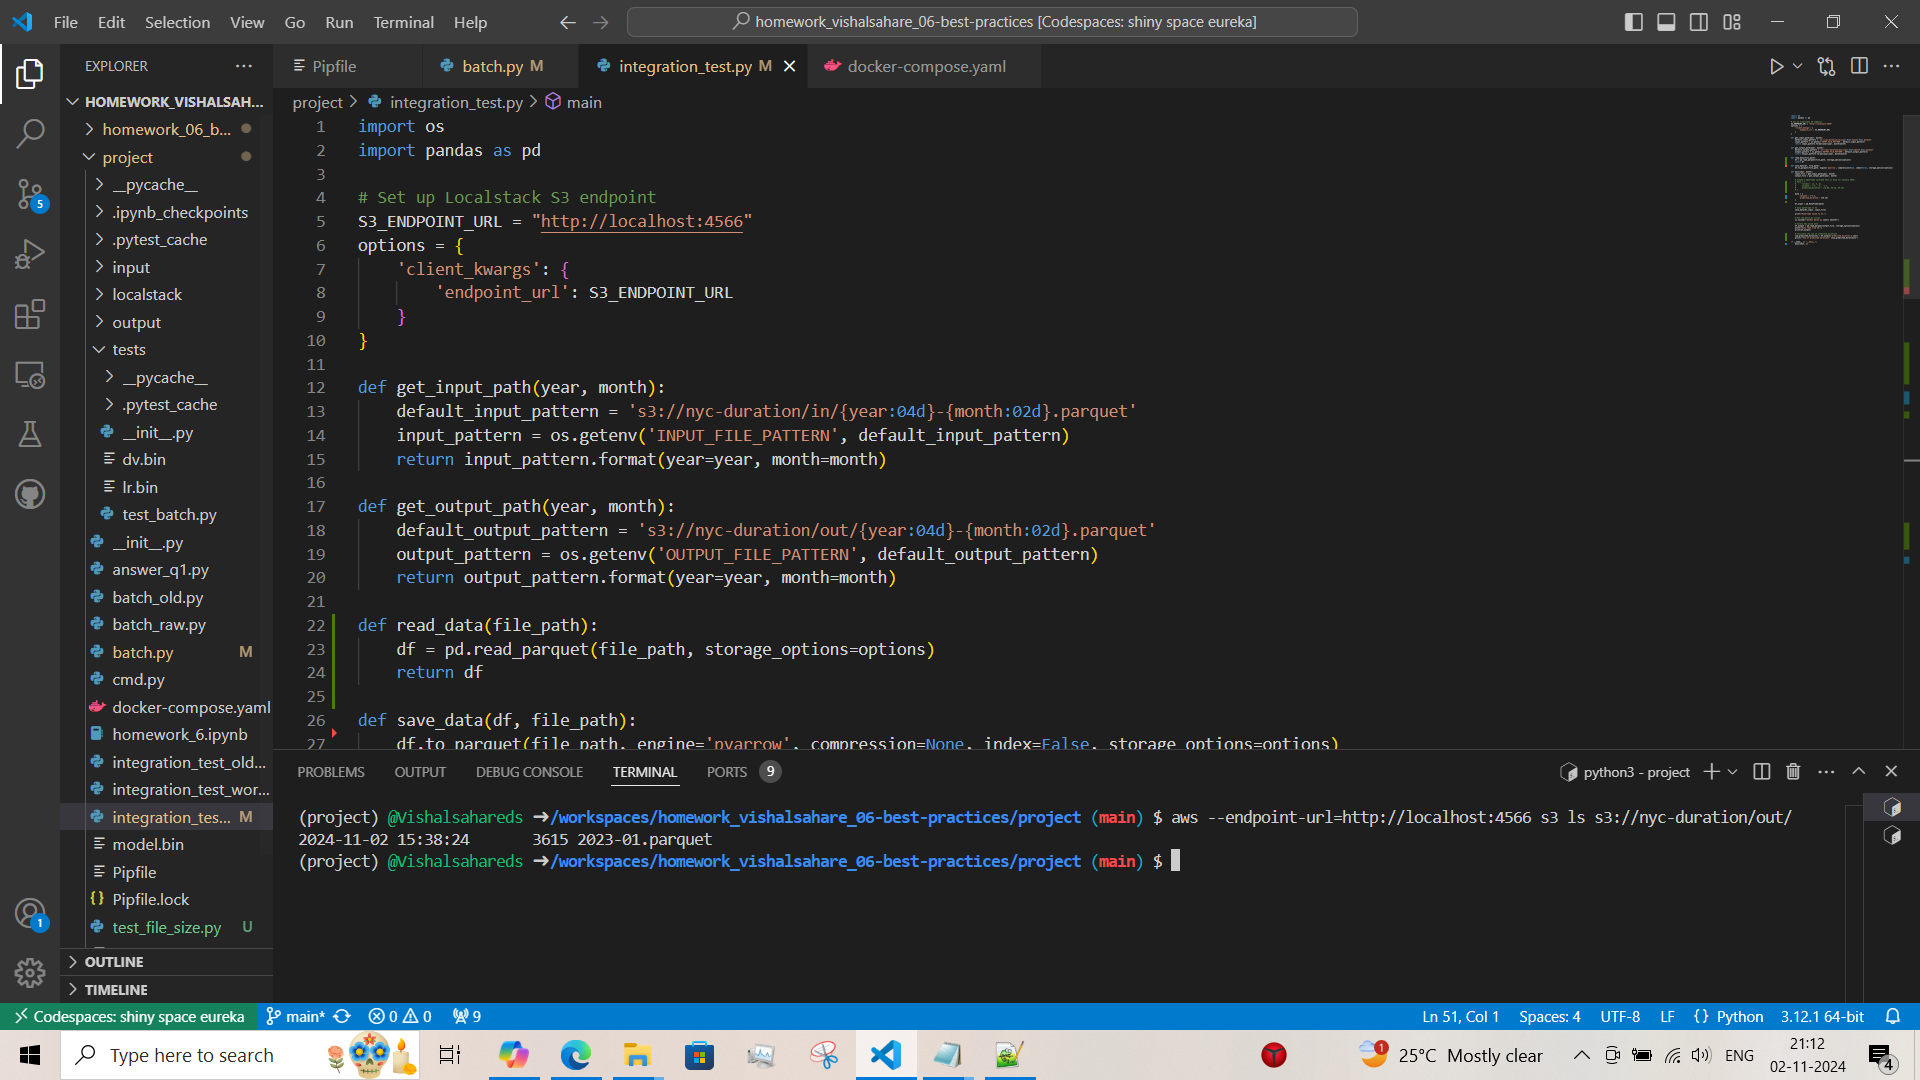